In [50]:
%autosave 0

Autosave disabled


In [77]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection

First, we have to read in the data from Codeup's tsa_item_demand database.

In [52]:
query = '''
        SELECT 
            sale_date,
            sale_amount,
            item_brand,
            item_name,
            item_price,
            store_address,
            store_zipcode,
            store_city,
            store_state
        FROM
            items
                LEFT JOIN
            sales ON sales.item_id = items.item_id
                LEFT JOIN
            stores ON stores.store_id = sales.store_id
        '''
url = get_connection('tsa_item_demand')
df = pd.read_sql(query, url)

In [53]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_state    913000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 62.7+ MB


### 1. Convert date column to datetime format.

In [55]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  object        
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 62.7+ MB


### 2. Plot the distribution of sale_amount and item_price.

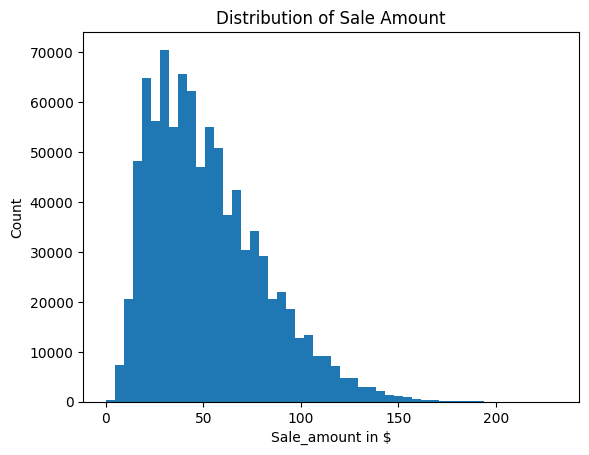

In [56]:
plt.hist(df.sale_amount, bins = 50)
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale_amount in $')
plt.ylabel('Count')
plt.show()

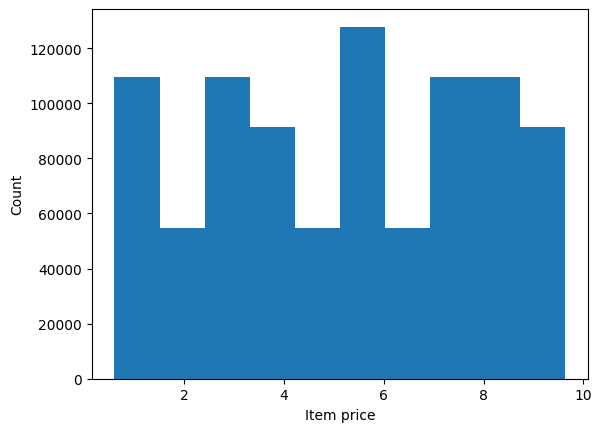

In [57]:
plt.hist(df.item_price)
plt.xlabel('Item price')
plt.ylabel('Count')
plt.show()

### 3. Set the index to be the datetime variable.

In [58]:
df = df.set_index('sale_date').sort_values(by='sale_date')
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [64]:
df['month'] = df.index.month_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January


In [66]:
df['week'] = df.index.day_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [67]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.
how do i format my functions:
- Check for local copy/read in data
- Convert to datetime/set index/sort index
- Column creation

In [90]:
def tsa_item_demand():
    filename = ('tsa_item_demand.csv')
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        url = get_connection('tsa_item_demand')
        query = '''
                SELECT 
                    sale_date,
                    sale_amount,
                    item_brand,
                    item_name,
                    item_price,
                    store_address,
                    store_zipcode,
                    store_city,
                    store_state
                FROM
                    items
                        LEFT JOIN
                    sales ON sales.item_id = items.item_id
                        LEFT JOIN
                    stores ON stores.store_id = sales.store_id
                '''
        df = pd.read_sql(query, url)
        df.to_csv(filename, index = False)
        return df 

In [102]:
def date_time_index(df):
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_values(by='sale_date')
    return df

In [106]:
def create_column(df):
    df['sale_total'] = df.sale_amount * df.item_price
    return df